# EDA 
1.Handling Duplicated Values 2.
Handling Noising Value s3.
Handling Missing Valu e4.s
Balancing Dataset IF Task Is Classificat i5.on
Summary Statis t6.ics
Correlation Ana l7.ysis
Inconsistant Data  8.Entry
Data Visual ization

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Loan_Prediction_For_pipeline.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# To Remove Duplicated Value Since None is present we dont need to perform 
df.duplicated().sum()
# df.drop_duplicates() 

0

In [9]:
# For Trainning A Model Loan ID is Not recquired so from trainning purposes we will remove it
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [13]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

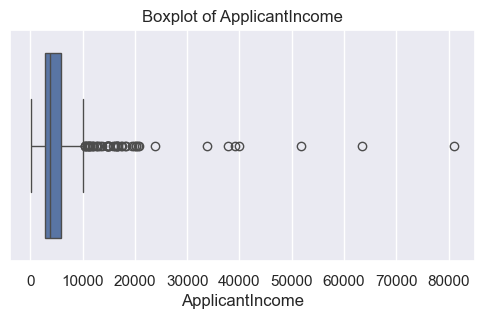

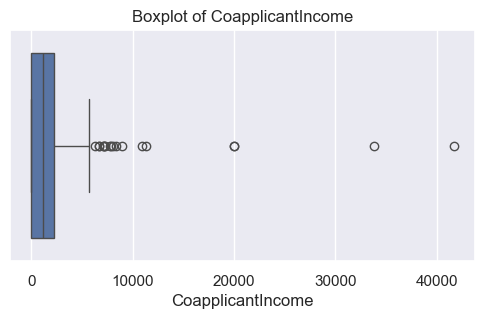

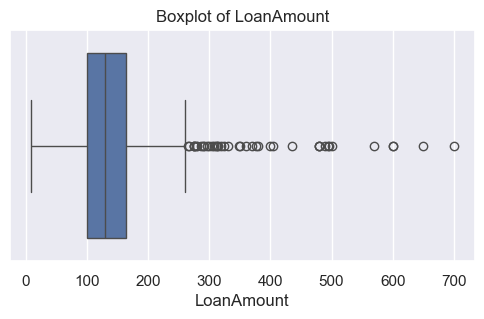

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [15]:

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)



In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
from sklearn.impute import SimpleImputer


cat_cols = df.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [18]:
Nominal_fetaures = ['Gender', 'Married','Education', 'Self_Employed', 'Property_Area']
print(df['Gender'].unique())
print(df['Education'].unique())
print(df['Married'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())

['Male' 'Female']
['Graduate' 'Not Graduate']
['No' 'Yes']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


In [19]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Married']=df['Married'].map({'No':0,'Yes':1})
df['Education']=df['Education'].map({'Graduate':0 ,'Not Graduate':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].map({'Urban':0 ,'Rural':1, 'Semiurban':2})

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,Y
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,N
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,Y
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,Y
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,Y


In [21]:
def convert_types(df,Nominal_fetaures):
    for i in Nominal_fetaures:
        df[i]=df[i].astype(int)

In [22]:
convert_types(df,Nominal_fetaures)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [24]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Nominal_fetaures:
    df[i]=le.fit_transform(df[i])


In [26]:
df['Dependents']=le.fit_transform(df['Dependents'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [27]:
from sklearn.model_selection import train_test_split
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
X_train, X_val, y_train, y_val =train_test_split(X,y , test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_val=model1.predict(X_val)

In [29]:
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

Logistic Regression Validation Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [30]:
n_estimators=[100,200,300,400,500,600]
l=[]
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state=42)

    rf.fit(X_train, y_train)
    y_pred_val_rf = rf.predict(X_val)
    l.append(accuracy_score(y_val, y_pred_val_rf))
print(l)

[0.7804878048780488, 0.7804878048780488, 0.7723577235772358, 0.7723577235772358, 0.7723577235772358, 0.7723577235772358]


# Classifies On which the Perfomance is Best at estimators =100 so will train model at that 

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred_val_rf = rf.predict(X_val)
print("\nRandom Forest Validation Accuracy:", accuracy_score(y_val, y_pred_val_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val_rf))


Random Forest Validation Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



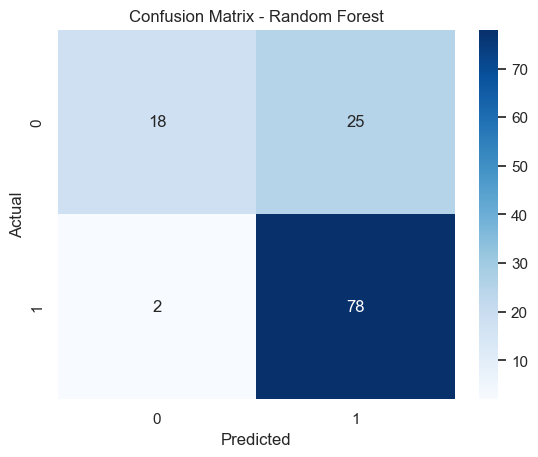

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_val_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# from xgboost import XGBClassifier


# xgb = XGBClassifier(
#     n_estimators=200,
#     learning_rate=0.05,
#     max_depth=4,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='logloss'
# )

# xgb.fit(X_train, y_train)
# y_pred_val_xgb = xgb.predict(X_val)

# # Validation performance
# print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_val_xgb))
# print("\nClassification Report:\n", classification_report(y_val, y_pred_val_xgb))